In [1]:
import numpy as np
from numpy import matlib
import scipy.stats as stats

#plt.xkcd() # omg...

from mpl_toolkits import mplot3d # allow 3d plots
import matplotlib.pyplot as plt

In [2]:
def generate_distribution(skew, mean, stdev):
    
    dist = []
    for _skew, _mean, _stdev in zip(skew, mean, stdev):
        dist.append(stats.skewnorm(a=_skew, loc=_mean, scale=_stdev))
        
    return dist
    
def distribution_pdf(dist, x):
    y = [_dist.pdf(_x) for _dist, _x in zip(dist, x)]
    return y

def sample_distribution(dist, num_samples):
    samples = [_dist.rvs(num_samples) for _dist in dist]
    return samples
    

## Class 1

Text(0.5,0,'Z')

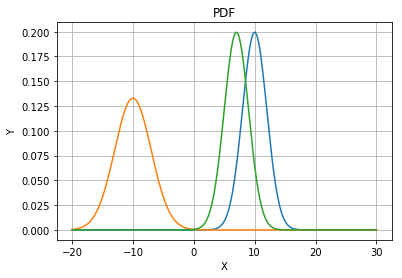

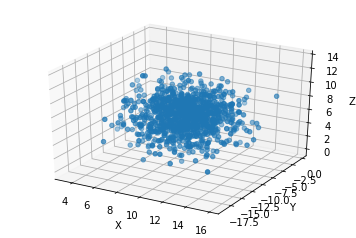

In [3]:
# 3D distribution
skew_1 = [0, 0, 0]
shift_1 = [10, -10, 7]
scale_1 = [2, 3, 2]

# generate distribution
dist_1 = generate_distribution(skew_1, shift_1, scale_1)

# define range and PDF
x_range_1 = [np.linspace(-20, 30, 1000) for _ in range(len(skew_1))]
y_1 = distribution_pdf(dist_1, x_range_1)

# plot PDF
plt.figure()
for _x, _y in zip(x_range_1, y_1):
    plt.plot(_x, _y)
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('PDF')

# generate samples
samples_1 = sample_distribution(dist_1, 1000)

# since we know there are 3D, plot the data in 3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(samples_1[0], samples_1[1], samples_1[2]);
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

## Class 2

Text(0.5,0,'Z')

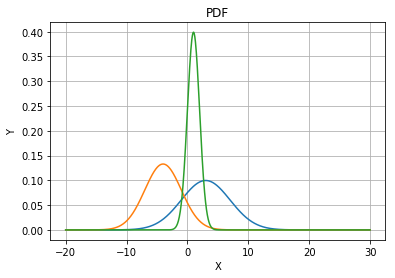

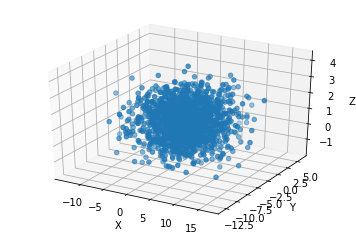

In [4]:
# 3D distribution
skew_2 = [0, 0, 0]
shift_2 = [3, -4, 1]
scale_2 = [4, 3, 1]

# generate distribution
dist_2 = generate_distribution(skew_2, shift_2, scale_2)

# define range and PDF
x_range_2 = [np.linspace(-20, 30, 1000) for _ in range(len(skew_2))]
y_2 = distribution_pdf(dist_2, x_range_2)

# plot PDF
plt.figure()
for _x, _y in zip(x_range_2, y_2):
    plt.plot(_x, _y)
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('PDF')

# generate samples
samples_2 = sample_distribution(dist_2, 1500)

# since we know there are 3D, plot the data in 3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(samples_2[0], samples_2[1], samples_2[2]);
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

## Class 3

Text(0.5,0,'Z')

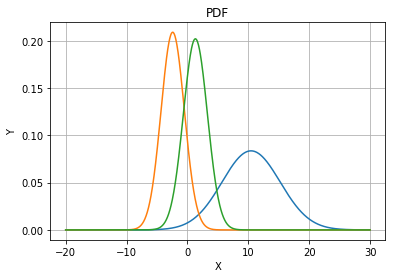

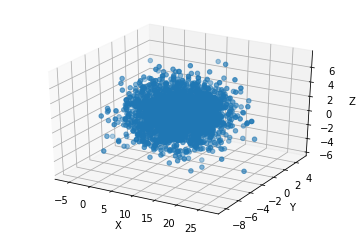

In [5]:
# 3D distribution
skew_3 = [.4, .4, .2]
shift_3 = [9, -3, 1]
scale_3 = [5, 2, 2]

# generate distribution
dist_3 = generate_distribution(skew_3, shift_3, scale_3)

# define range and PDF
x_range_3 = [np.linspace(-20, 30, 1000) for _ in range(len(skew_3))]
y_3 = distribution_pdf(dist_3, x_range_3)

# plot PDF
plt.figure()
for _x, _y in zip(x_range_3, y_3):
    plt.plot(_x, _y)
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('PDF')

# generate samples
samples_3 = sample_distribution(dist_3, 2500)

# since we know there are 3D, plot the data in 3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(samples_3[0], samples_3[1], samples_3[2]);
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

## Plot of Class 1 and Class 2

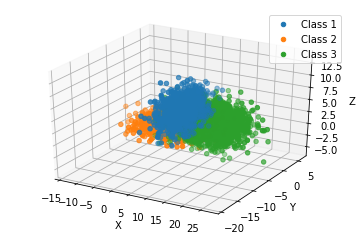

In [6]:
# since we know there are 3D, plot the data in 3D
# plot both classes
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(samples_1[0], samples_1[1], samples_1[2]);
ax.scatter3D(samples_2[0], samples_2[1], samples_2[2]);
ax.scatter3D(samples_3[0], samples_3[1], samples_3[2]);
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend(['Class 1', 'Class 2', 'Class 3'])

In [7]:
# consolidate classes together
sample_1_labels = np.ones(np.shape(samples_1)[1]) * 1
sample_2_labels = np.ones(np.shape(samples_2)[1]) * 2
sample_3_labels = np.ones(np.shape(samples_3)[1]) * 3

labels = np.concatenate((sample_1_labels, sample_2_labels, sample_3_labels))
samples = np.concatenate((samples_1, samples_2, samples_3), axis=1)

In [8]:
# visible: training - labels/samples
label_list = set(labels)

total_num_samples = np.shape(samples)[1]

L = len(label_list) # number of classes

class_prior = np.zeros(L)
class_mean = [[] for _ in range(L)]
class_cov = [[] for _ in range(L)]
class_cov_inv = [[] for _ in range(L)]
class_cov_det = [[] for _ in range(L)]

# identify the example indices for each class
for idx, label in enumerate(label_list):
    #print(labels == label)
    #print(np.shape(samples[:, labels==label]))
    #print(samples[:, labels==label])
    
    # Samples of given class
    class_samples = samples[:, labels==label]
    
    # Number of samples belonging to class
    num_class_samples = np.shape(class_samples)[1]
    
    # compute statistics
    class_prior[idx] = 1.0 * num_class_samples / total_num_samples
    class_mean[idx] = np.mean(class_samples, axis=1)
    class_cov[idx] = np.cov(class_samples)
    class_cov_inv[idx] = np.linalg.inv(class_cov[idx])
    class_cov_det[idx] = np.linalg.det(class_cov[idx])
    
#    # Estimate prior probabilities
#    class_prior(k) = num_class(k) / num_examples;
print('class_prior: {}'.format(class_prior))
print('class_mean: {}'.format(class_mean))
print('class_cov: {}'.format(class_cov))
print('class_cov_inv: {}'.format(class_cov_inv))
print('class_cov_det: {}'.format(class_cov_det))

class_prior: [0.2 0.3 0.5]
class_mean: [array([ 9.95270727, -9.93598143,  6.86145665]), array([ 2.99027586, -3.99665892,  1.02754449]), array([10.61180372, -2.38516259,  1.35350403])]
class_cov: [array([[ 3.93205307, -0.0804431 ,  0.05564391],
       [-0.0804431 ,  9.16382264, -0.24437242],
       [ 0.05564391, -0.24437242,  4.17630383]]), array([[ 1.65023644e+01,  4.80801750e-02, -8.82151026e-03],
       [ 4.80801750e-02,  9.16756409e+00, -1.02691569e-01],
       [-8.82151026e-03, -1.02691569e-01,  9.70043266e-01]]), array([[ 2.23055269e+01,  2.46451391e-01, -7.99684607e-02],
       [ 2.46451391e-01,  3.55023044e+00,  1.48007196e-02],
       [-7.99684607e-02,  1.48007196e-02,  3.69248047e+00]])]
class_cov_inv: [array([[ 0.25441017,  0.00214625, -0.0032641 ],
       [ 0.00214625,  0.10931342,  0.00636777],
       [-0.0032641 ,  0.00636777,  0.23986227]]), array([[ 6.05985631e-02, -3.12012028e-04,  5.18048894e-04],
       [-3.12012028e-04,  1.09211341e-01,  1.15585892e-02],
       [ 5.1

## Testing

In [9]:
def compute_discriminant(class_mean, class_cov_inv, class_prior, class_cov_det, label_list, test_samples):
    discriminant = [[] for _ in range(L)]
    
    # compute discriminant
    for idx, label in enumerate(label_list):
        num_test_samples = np.shape(test_samples)[1]
        _X = test_samples - np.matlib.repmat(class_mean[idx], num_test_samples, 1).T
        
        _M = np.sum(np.multiply( np.matmul(_X.T, class_cov_inv[idx]), _X.T), axis=1 )
        
        det_term = np.log(class_cov_det[idx])
        prior_term = np.log(class_prior[idx])
        
        discriminant[idx] = .5*_M + .5*det_term - prior_term;
        
    test_labels_result = np.argmin(discriminant, axis=0) # get index of result
    test_labels_result = [list(label_list)[result] for result in test_labels_result] # get result name
    return test_labels_result # estimated predictions

In [10]:
# generate test samples
test_samples = sample_distribution(dist_2, 200)
test_truth = np.ones(np.shape(test_samples)[1]) * 2

discriminant = [[] for _ in range(L)]
# compute discriminant
for idx, label in enumerate(label_list):
    num_test_samples = np.shape(test_samples)[1]
    #print(np.shape(np.matlib.repmat(class_mean[idx], num_test_samples, 1).T))
    _X = test_samples - np.matlib.repmat(class_mean[idx], num_test_samples, 1).T
    #print(np.shape(_X))
    #print(np.shape(class_cov_inv[idx]))
    _M = np.sum(np.multiply( np.matmul(_X.T, class_cov_inv[idx]), _X.T), axis=1 )
    #print(np.shape(_M))
    
    det_term = np.log(class_cov_det[idx])
    prior_term = np.log(class_prior[idx])
    #print(det_term)
    #print(prior_term)
    
    discriminant[idx] = .5*_M + .5*det_term - prior_term;
    #print(np.shape(discriminant))
    #print(discriminant)
    #det_term = log( class_cov_det(k) );
    #prior_term = log(class_prior(k));
    #print(_M)
    #test_samples - np.matlib.repmat(class_mean[idx], num_points*num_points, 1)
    
#print(np.shape(discriminant))
test_labels_result = np.argmin(discriminant, axis=0) # get index of result
test_labels_result = [list(label_list)[result] for result in test_labels_result] # get result name
print(test_labels_result)

[2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 1.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]

In [11]:
prediction = compute_discriminant(class_mean, class_cov_inv, class_prior, class_cov_det, label_list, test_samples)
print(prediction)

[2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 1.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]

In [12]:
test_input = np.array([[0, 0, 0]]).T
print(np.shape(test_input))
print(np.shape(test_samples))
prediction = compute_discriminant(class_mean, class_cov_inv, class_prior, class_cov_det, label_list, test_input)
print(prediction)

(3, 1)
(3, 200)
[2.0]


In [13]:
# plot 3D features
num_points = 100
x_range, step_x = np.linspace(-20, 20, num_points, retstep=True)
y_range, step_y = np.linspace(-20, 20, num_points, retstep=True)
z_range, step_z = np.linspace(-20, 20, num_points, retstep=True)

[X1, X2, X3] = np.meshgrid(x_range, y_range, z_range)

X = np.array((X1.flatten(), X2.flatten(), X3.flatten())).T

# compute the discriminant function
_X1 = X - np.matlib.repmat(class_mean[0], len(X), 1)
_X2 = X - np.matlib.repmat(class_mean[1], len(X), 1)
#_X3 = X - np.matlib.repmat(class_mean[2], len(X), 1)

_M1 = np.sum(np.multiply( np.matmul(_X1, class_cov_inv[0]), _X1), axis=1 )
_M2 = np.sum(np.multiply( np.matmul(_X2, class_cov_inv[1]), _X2), axis=1 )
#_M3 = np.sum(np.multiply( np.matmul(_X2, class_cov_inv[2]), _X2), axis=1 )

det_ratio = np.log(1.0 * class_cov_det[0] / class_cov_det[1])
prior_term = 2 * np.log(1.0 * class_prior[1] / class_prior[0])

discriminant = _M1 - _M2 + prior_term + det_ratio

In [14]:
I = np.where(discriminant <= 0)
#print(I)

#print(discriminant.shape)
out = np.zeros((num_points, num_points, num_points))

I = np.unravel_index(I, (out.shape))

#out [discriminant <= 0] = 1
out[I] = 1
#print(out)

#print(_X1.shape)
#print(_X2.shape)

'''
# plot sample points
plt.figure()
plt.plot(samples_1[0], samples_1[1], 'r+')
plt.plot(samples_2[0], samples_2[1], 'bo')
plt.plot(samples_3[0], samples_3[1], 'g*')
#plt.contourf(X1, X2, out, 1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sampled Points')
plt.grid()
plt.legend(['class_1', 'class_2', 'class_3'], loc='best')

# since we know there are 3D, plot the data in 3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(samples_1[0], samples_1[1], samples_1[2]);
ax.scatter3D(samples_2[0], samples_2[1], samples_2[2]);
ax.scatter3D(samples_3[0], samples_3[1], samples_3[2]);

#ax.contour3D(samples_1[0], samples_1[1], out, 50)
#ax.contour(X1, X2, X3, 10, lw=3, colors="k", linestyles="solid")
#ax.contour(X1, X2, X3)
#ax.plot_trisurf(X1, X2, X3)
print(np.shape(X2[:,0,0]))
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X1[:,:,:], X2[:,:,:], X3[:,:,:])
#ax.plot_trisurf(X1[:,0,0], X2[:,0,0], X3[:,0,0])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
'''

'\n# plot sample points\nplt.figure()\nplt.plot(samples_1[0], samples_1[1], \'r+\')\nplt.plot(samples_2[0], samples_2[1], \'bo\')\nplt.plot(samples_3[0], samples_3[1], \'g*\')\n#plt.contourf(X1, X2, out, 1)\nplt.xlabel(\'X\')\nplt.ylabel(\'Y\')\nplt.title(\'Sampled Points\')\nplt.grid()\nplt.legend([\'class_1\', \'class_2\', \'class_3\'], loc=\'best\')\n\n# since we know there are 3D, plot the data in 3D\nfig = plt.figure()\nax = plt.axes(projection=\'3d\')\nax.scatter3D(samples_1[0], samples_1[1], samples_1[2]);\nax.scatter3D(samples_2[0], samples_2[1], samples_2[2]);\nax.scatter3D(samples_3[0], samples_3[1], samples_3[2]);\n\n#ax.contour3D(samples_1[0], samples_1[1], out, 50)\n#ax.contour(X1, X2, X3, 10, lw=3, colors="k", linestyles="solid")\n#ax.contour(X1, X2, X3)\n#ax.plot_trisurf(X1, X2, X3)\nprint(np.shape(X2[:,0,0]))\nfig = plt.figure()\nax = plt.axes(projection=\'3d\')\nax.plot_surface(X1[:,:,:], X2[:,:,:], X3[:,:,:])\n#ax.plot_trisurf(X1[:,0,0], X2[:,0,0], X3[:,0,0])\n\nax.se

In [15]:
'''
from mayavi import mlab
#src = mlab.pipeline.scalar_field(out)
#mlab.pipeline.iso_surface(src, contours=[s.min()+0.1*s.ptp(), ], opacity=0.3)
#mlab.pipeline.iso_surface(src, contours=[s.max()-0.1*s.ptp(), ],)
#
#mlab.pipeline.iso_surface(out)
verts, faces, normals, values = measure.marching_cubes_lewiner(out, spacing=(step_x, step_y, step_z))

mlab.triangular_mesh([vert[0] for vert in verts],
                     [vert[1] for vert in verts],
                     [vert[2] for vert in verts],
                     faces) 

mlab.show()
'''

'\nfrom mayavi import mlab\n#src = mlab.pipeline.scalar_field(out)\n#mlab.pipeline.iso_surface(src, contours=[s.min()+0.1*s.ptp(), ], opacity=0.3)\n#mlab.pipeline.iso_surface(src, contours=[s.max()-0.1*s.ptp(), ],)\n#\n#mlab.pipeline.iso_surface(out)\nverts, faces, normals, values = measure.marching_cubes_lewiner(out, spacing=(step_x, step_y, step_z))\n\nmlab.triangular_mesh([vert[0] for vert in verts],\n                     [vert[1] for vert in verts],\n                     [vert[2] for vert in verts],\n                     faces) \n\nmlab.show()\n'

In [16]:
'''
print(np.shape(X1))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, X1, color='green', alpha=0.5)
'''

"\nprint(np.shape(X1))\n\nfig = plt.figure(figsize=(10, 10))\nax = fig.add_subplot(111, projection='3d')\nax.plot_surface(X1, X2, X1, color='green', alpha=0.5)\n"

In [17]:
'''
from skimage import measure
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

#verts, faces, = measure.marching_cubes_classic(out, 0, spacing=(1, 1, 1))

verts, faces, normals, values = measure.marching_cubes_lewiner(out, spacing=(step_x, step_y, step_z))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(samples_1[0], samples_1[1], samples_1[2]);
ax.scatter3D(samples_2[0], samples_2[1], samples_2[2]);
#ax.scatter3D(samples_3[0], samples_3[1], samples_3[2]);

#mesh = Poly3DCollection(verts[faces], alpha=0.1)
#face_color = [0.5, 0.5, 1]
#mesh.set_facecolor(face_color)
#ax.add_collection3d(mesh)

mesh = Poly3DCollection(verts[faces])
ax.add_collection3d(mesh)

#ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2], lw=1)
plt.show()
'''

"\nfrom skimage import measure\nfrom mpl_toolkits.mplot3d.art3d import Poly3DCollection\n\n#verts, faces, = measure.marching_cubes_classic(out, 0, spacing=(1, 1, 1))\n\nverts, faces, normals, values = measure.marching_cubes_lewiner(out, spacing=(step_x, step_y, step_z))\n\nfig = plt.figure(figsize=(10, 10))\nax = fig.add_subplot(111, projection='3d')\nax.scatter3D(samples_1[0], samples_1[1], samples_1[2]);\nax.scatter3D(samples_2[0], samples_2[1], samples_2[2]);\n#ax.scatter3D(samples_3[0], samples_3[1], samples_3[2]);\n\n#mesh = Poly3DCollection(verts[faces], alpha=0.1)\n#face_color = [0.5, 0.5, 1]\n#mesh.set_facecolor(face_color)\n#ax.add_collection3d(mesh)\n\nmesh = Poly3DCollection(verts[faces])\nax.add_collection3d(mesh)\n\n#ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2], lw=1)\nplt.show()\n"

In [18]:
import nengo
from nengo_extras.gui import image_function, image_display_function

In [19]:
# Support functions
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

def sample_distribution(t, n_points=1):
    x = class_1x.rvs(n_points)
    y = class_1y.rvs(n_points)
    
    return np.append(x, y)

def compute_discriminant_node(t, x):
    prediction = compute_discriminant(class_mean, class_cov_inv, class_prior, 
                                      class_cov_det, label_list, np.array([x]).T)
    return prediction

def compute_boundary(t, test_sample):
    [X1, X2] = np.meshgrid(np.linspace(c_min[0], c_max[0], num_points), np.linspace(c_min[1], c_max[1], num_points))

    X = np.array((X1.flatten(), X2.flatten())).T

    # compute the discriminant function
    _X1 = X - np.matlib.repmat(c1_samp_mean, num_points*num_points, 1)
    _X2 = X - np.matlib.repmat(c2_samp_mean, num_points*num_points, 1)
    _M1 = np.sum(np.multiply( np.matmul(_X1, c1_samp_cov_inv), _X1), axis=1 )
    _M2 = np.sum(np.multiply( np.matmul(_X2, c2_samp_cov_inv), _X2), axis=1 )

    # compute the likelihood ratio
    det_ratio = np.log(1.0 * c1_samp_cov_det / c1_samp_cov_det)

    # compute the prior
    prior_term = 2 * np.log(1.0 * c2_prior / c1_prior)

    discriminant = _M1 - _M2 + prior_term + det_ratio
    
    # generate plot
    I = np.where(discriminant <= 0)
    out = np.zeros((num_points, num_points))
    I = np.unravel_index(I, (out.shape))
    out[I] = 1

    # plot sample points
    fig = Figure()
    canvas = FigureCanvas(fig)
    ax = fig.gca()
    ax.plot(x1_samp, y1_samp, 'r+')
    ax.plot(x2_samp, y2_samp, 'bo')
    ax.plot(test_sample[0], test_sample[1], 'm*')
    ax.contourf(X1, X2, out, 1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Sampled Points')
    ax.grid()
    ax.legend(['class_1', 'class_2', 'test_sample'], loc='best')

    canvas.draw()
    s, (width, height) = canvas.print_to_buffer()

    # convert matplot to np image
    X = np.fromstring(s, np.uint8).reshape((height, width, 4))
    img = np.transpose(X, (2,0,1))

    # flatten image into a single vector
    X = img.flatten()

    # normalize image between 0 and 1
    X = 1.0 * X / np.max(X)
    return X

'''
    u = nengo.Node(X)
    #u = nengo.Node(nengo.processes.PresentInput([X], 0.1))
    display_f = image_display_function((3, 300, 350)) # set size to be (channel, height, width)
    #display_f = image_display_function(image.size + (3,))
    display_node = nengo.Node(display_f, size_in=u.size_out)
    nengo.Connection(u, display_node, synapse=None)
'''

'''
[X1, X2] = np.meshgrid(np.linspace(c_min[0], c_max[0], num_points), np.linspace(c_min[1], c_max[1], num_points))

X = np.array((X1.flatten(), X2.flatten())).T

# compute the discriminant function
_X1 = X - np.matlib.repmat(c1_samp_mean, num_points*num_points, 1)
_X2 = X - np.matlib.repmat(c2_samp_mean, num_points*num_points, 1)
_M1 = np.sum(np.multiply( np.matmul(_X1, c1_samp_cov_inv), _X1), axis=1 )
_M2 = np.sum(np.multiply( np.matmul(_X2, c2_samp_cov_inv), _X2), axis=1 )

# compute the likelihood ratio
det_ratio = np.log(1.0 * c1_samp_cov_det / c1_samp_cov_det)

# compute the prior
prior_term = 2 * np.log(1.0 * c2_prior / c1_prior)

discriminant = _M1 - _M2 + prior_term + det_ratio
'''


'\n[X1, X2] = np.meshgrid(np.linspace(c_min[0], c_max[0], num_points), np.linspace(c_min[1], c_max[1], num_points))\n\nX = np.array((X1.flatten(), X2.flatten())).T\n\n# compute the discriminant function\n_X1 = X - np.matlib.repmat(c1_samp_mean, num_points*num_points, 1)\n_X2 = X - np.matlib.repmat(c2_samp_mean, num_points*num_points, 1)\n_M1 = np.sum(np.multiply( np.matmul(_X1, c1_samp_cov_inv), _X1), axis=1 )\n_M2 = np.sum(np.multiply( np.matmul(_X2, c2_samp_cov_inv), _X2), axis=1 )\n\n# compute the likelihood ratio\ndet_ratio = np.log(1.0 * c1_samp_cov_det / c1_samp_cov_det)\n\n# compute the prior\nprior_term = 2 * np.log(1.0 * c2_prior / c1_prior)\n\ndiscriminant = _M1 - _M2 + prior_term + det_ratio\n'

In [20]:
model = nengo.Network('Bayes Classifier L')

with model:
    # obtain sample points
    #input_samples = nengo.Node(sample_distribution)
    input_samples = nengo.Node([0, 0, 0])
    
    discriminant = nengo.Node(compute_discriminant_node, size_in=3, size_out=1)
    
    output = nengo.Ensemble(10, 1)
    
    nengo.Connection(input_samples, discriminant)
    nengo.Connection(discriminant, output, function=lambda x: np.sign(x))
    '''
    boundary = nengo.Node(compute_boundary, size_in=2)
    nengo.Connection(input_samples, boundary, synapse=None)
    
    display_f = image_display_function((4, 288, 432)) # set size to be (channel, height, width)
    display_node = nengo.Node(display_f, size_in=boundary.size_out)
    nengo.Connection(boundary, display_node, synapse=None)
    '''

In [21]:
# View Model
from nengo_gui.ipython import IPythonViz
IPythonViz(model)